# Lab Assignment 1 - Classification

**----- Import all libraries here -----**

In [878]:
# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#added imports
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# 1. Data Analysis 

<span style="color:blue">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    
<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset. *(2 points)*</span>

In [879]:
# --- Your code here ---

## read csv
pima = pd.read_csv('diabetes.csv')

## print dtypes
pima.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<span style="color:blue">2) Are there any missing values in the dataset? Print out the total count of missing values for the attributes in the dataset. How would you handle the missing values without deleting any record? Develop and execute an operation for that purpose accordingly. *(3 points)*</span>

In [880]:
# --- Your code here ---

# Are there any missing values?
print(pima.isnull().values.any())
print('-------------------------')

#Print total count of missing values
print(pima.isnull().sum().sum())
print(pima.isnull().sum())



True
-------------------------
3
Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64


<span> 
    You can clearly see above that its true that there are missing values within the dataset. These can be found within BloodPressure, SkinThickness and DiabetesPedigreeFunction which each have one missing value. To handle missing data without deleting any records there are a few options using impute techniques:

Option 1(Average) - You can fill in the missing values with the mean, median or mode of the specified column.

Option 2 (Predict missing values) - You can use Deterministic Regression or Stochastic Regression for example to predict the missing value.</span>

In [881]:
# handle missing values by replacing NaN with the mean value of its corresponding column
pima.fillna(pima.mean(), inplace=True)
# Check that no value is NaN
print(pima.isnull().values.any())

False


<span style="color:blue">3) Examine Outcome by generating a bar plot showing the count of “0” and “1” in Outcome. Write down any of your insights from observing the bar plot. *(3 points)*</span>

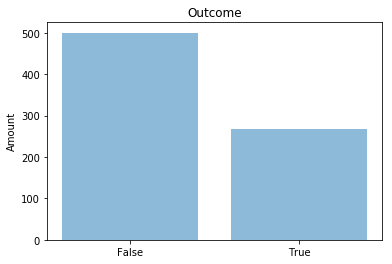

In [882]:
# --- Your code here ---

# count the values from outcome attribute then use it as an input for a bar plot, replacing 0 for false and 1 for true 
plt.bar([0,1], pima.Outcome.value_counts(), align='center', alpha=0.5)
plt.xticks([0,1], ['False','True'])
plt.ylabel('Amount')
plt.title('Outcome')
plt.show()


<span style="color:blue"> Write down any of your insights from observing the bar plot.
    
    As seen above in the bar plot there are 500 people who have an outcome of flase and 268 have an outcome of true. thats almost 35% of prima's are predicted to have diabetes according to this dataset.
</span>

<span style="color:blue">4) Generate a pairwise relationship scatterplot (8x8 subplots) using __sb.pairplot(pima, vars=feature_column_names, hue='Outcome')__. *(2 points)*</span>

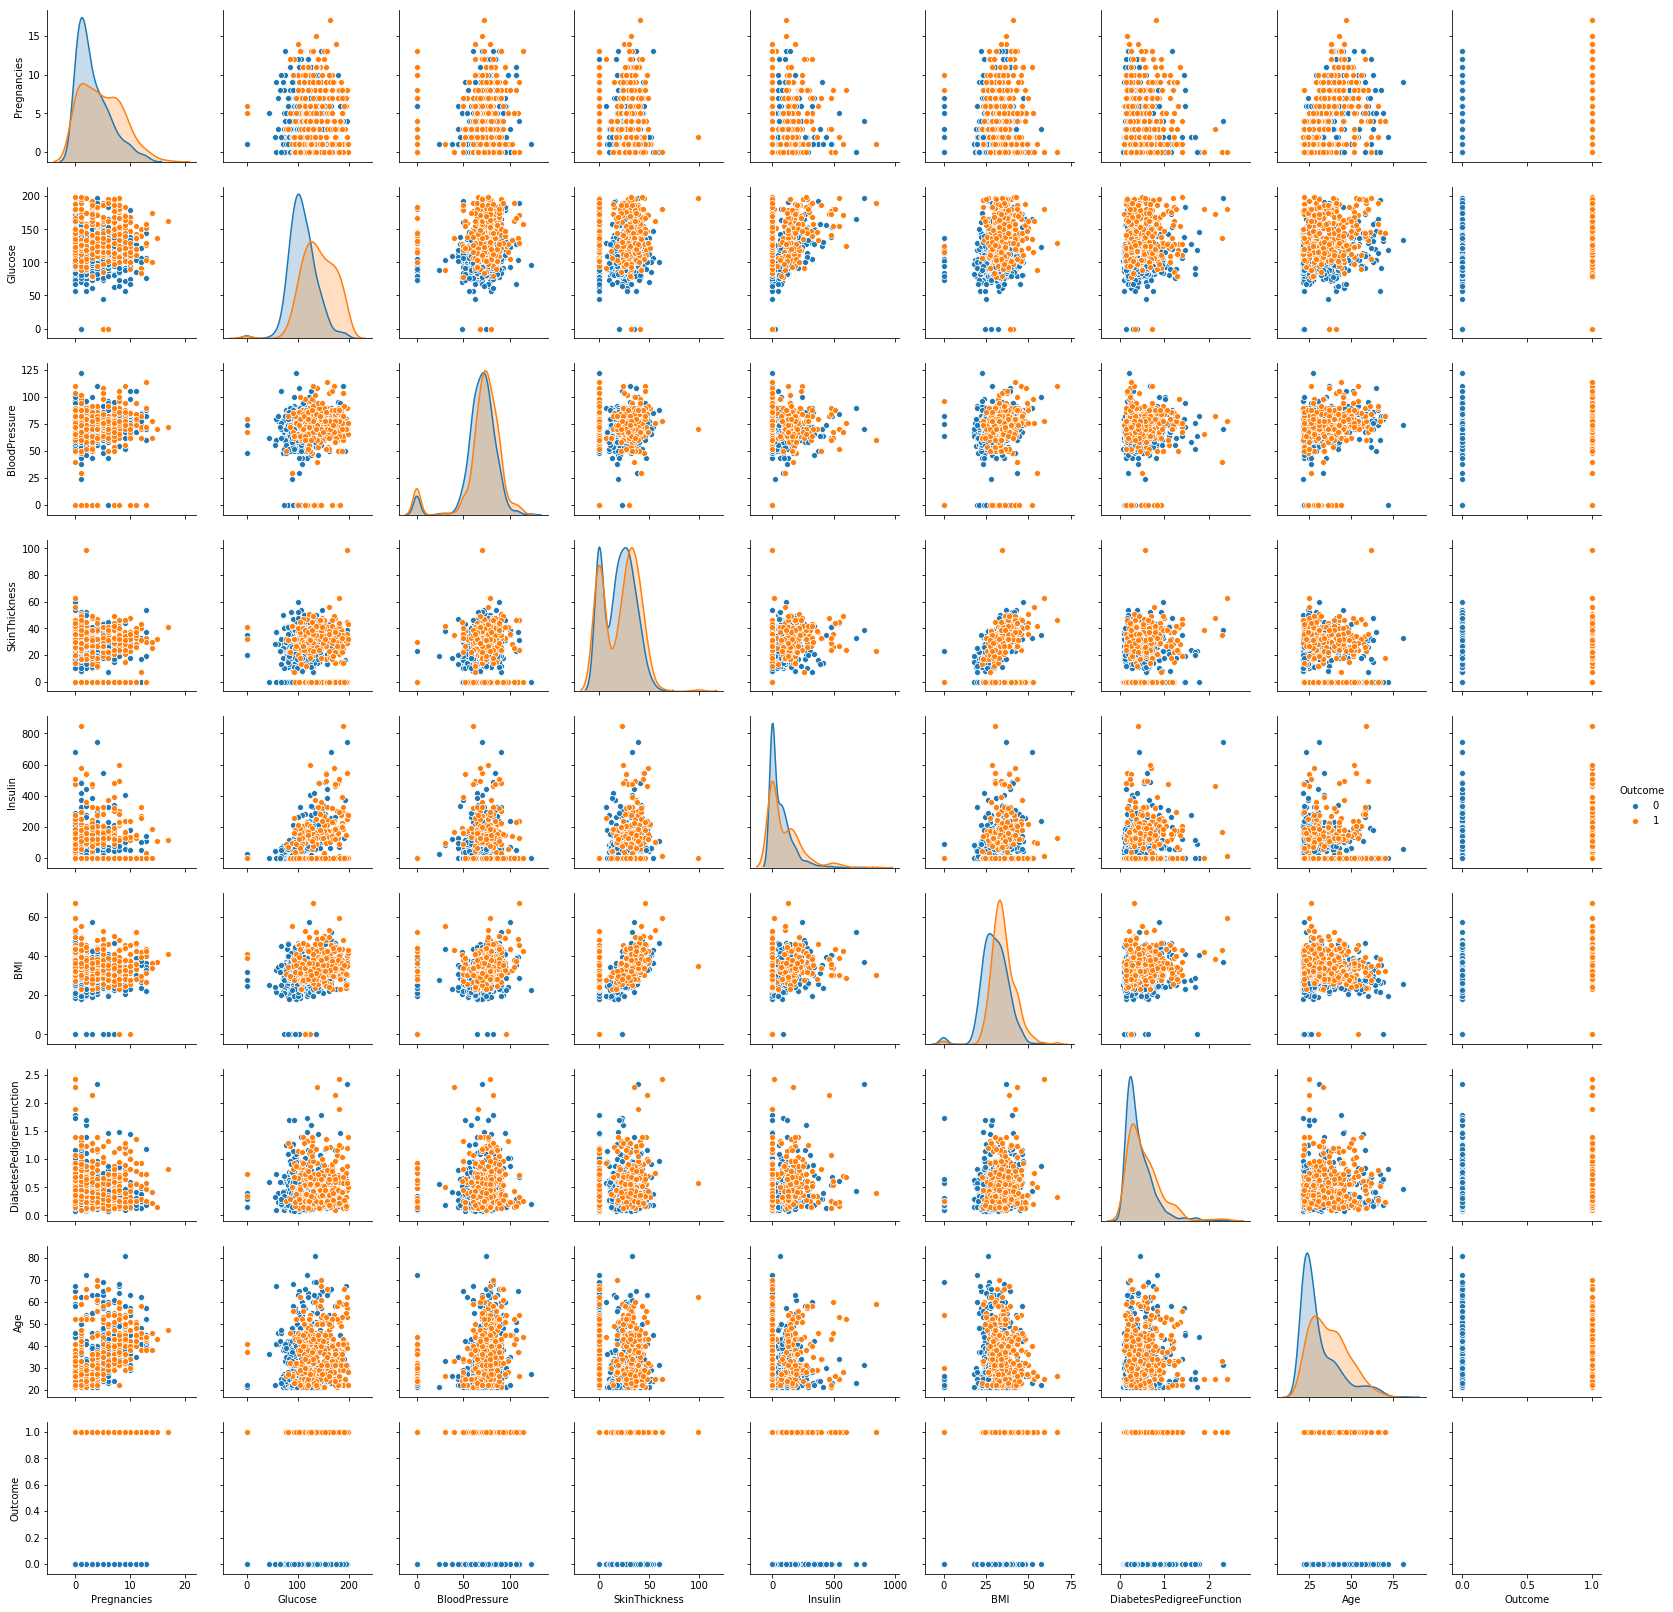

In [883]:
# --- Your code here ---

# get all column names and remove Outcome
items = list(pima.columns.values)

sb.pairplot(pima, vars=items, hue='Outcome')

<span style="color:blue">5) Generate a 9x9 heatmap plot showing the co-variance between any two features (including target). *(2 points)*<br/>
    
<span style="color:blue">_(Hint: use __sb.clustermap(pima.corr(), annot=True)__ to plot co-variance heatmap.)_</span>

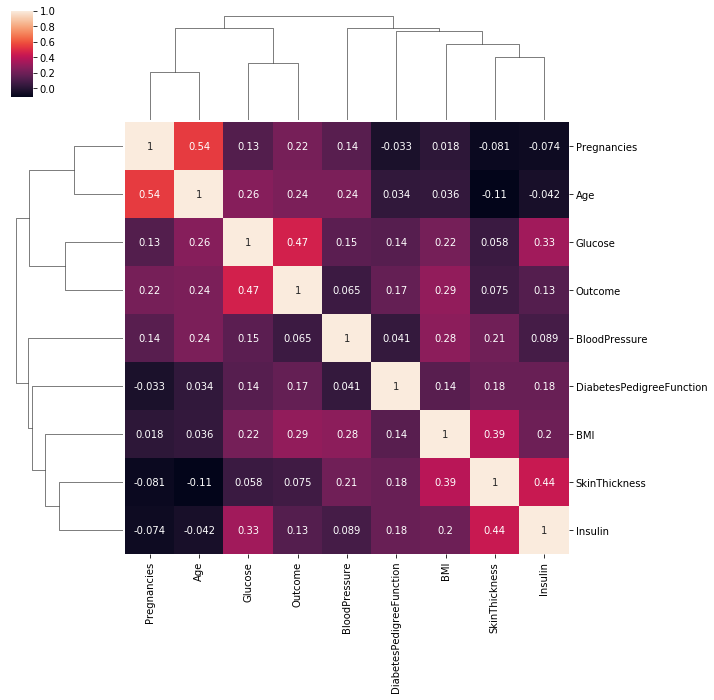

In [884]:
# --- Your code here ---
sb.clustermap(pima.corr(), annot=True)

<span style="color:blue">6) What are the insights you gained from the two plots generated from 4) and 5)? *(3 points)*</span>

<span style="color:blue">_(Hint: think about how to perform feature selection based on the observations, which may be helpful for constructing your best model in Section 4.)_</span>

<span style="color:blue">--- Reviewing the two plots of all attributes in the dataset shows that:

There seems to be no relationship  between diabetes pedigree function and diabetes.
This could be seen as that diabetes is not hereditary or that the diabetes pedigree function is incorrect.

The greater the Pregnancies or the BMI of a patient is, the greater probabilities are the patient can develop type 2 diabetes.
---</span>


# 2. Feature Transformation

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. This transformation can be achieved as follows: cut the continuous values of each feature into non-overlapping buckets.  Perform this operation on all 8 continuous variables.  You are to devise you own method to cut the continuous values into buckets. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 conlumns with the same set of column names as pima. Use **pima1.head()** to show the top rows. *(5 points)*</span>
    
<span style="color:blue">*(Hint: you can use **pandas.cut()** or **pandas.qcut()** to convert continuous feature to categorical feature. e.g. For Glucose, if you wish to adopt the glucose level guidelines given by American Diabetes Association, you can convert its values into 3 groups:<br/>*
*- Normal > 140mg/dl of glucose,<br/>*
*- Prediabete 140-199mg/dl of glucose,<br/>*
*- Diabetes > 200mg/dl of glucose<br/>*
*using  **pd.cut(pima[’Glucose’],[50,139.99,199.99,250], labels=[0, 1, 2])**. Or you can use **pd.qcut(pima[’Glucose’],4, labels=[0,1,2,3])** to cut the values according to quantile-based discretization function.)*
</span>

In [885]:
# --- Your code here ---
pima1 = pima.copy()
pima1['Glucose'] = pd.cut(pima['Glucose'],[50,139.99,199.99,250], labels=['Normal', 'Prediabete', 'Diabetes'])
pima1['BMI'] = pd.cut(pima['BMI'],[0,50,139.99,199.99,250], labels=['Underweight', 'Normal weight', 'Overweight','Obesity'])
pima1['Pregnancies'] =  pd.cut(pima['Pregnancies'],3, labels=['Low','Medium','High'])
pima1['BloodPressure'] = pd.cut(pima['BloodPressure'],[0,60,139,159,math.inf], labels=['Normal','Prehypertension','Hypertension (Stage 1)','Hypertension (Stage 2)'])
pima1['Insulin'] =  pd.cut(pima['Insulin'],[0,140,199,math.inf], labels=['Low','Medium','High'],include_lowest=True)
pima1['SkinThickness'] = pd.qcut(pima['SkinThickness'],3, labels=['Low','Medium','High'])
pima1['DiabetesPedigreeFunction'] = pd.qcut(pima['DiabetesPedigreeFunction'],3, labels=['Low','Medium','High'])
pima1['Age'] = pd.cut(pima['Age'],[0,30,50,math.inf], labels=['Young','Middle Aged','Old'])


<span style="color:blue">2) Next, we convert the generated categorical features into binary features using the **one-hot encoding scheme**. Assume the continuous feature has m numerical labels. The one-hot encoding scheme will results in a vector of size m with only one of the values as 1 (indicating it as active). Use **pima1.head()** to show the top rows of the encoded pima1. *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each categorical feature in pima1 into multiple binary features.)*</span>

In [886]:
# --- Your code here ---
pima1 = pd.get_dummies(pima1)

pima1.head()

,Outcome,Pregnancies_Low,Pregnancies_Medium,Pregnancies_High,Glucose_Normal,Glucose_Prediabete,Glucose_Diabetes,BloodPressure_Normal,BloodPressure_Prehypertension,BloodPressure_Hypertension (Stage 1),...,BMI_Underweight,BMI_Normal weight,BMI_Overweight,BMI_Obesity,DiabetesPedigreeFunction_Low,DiabetesPedigreeFunction_Medium,DiabetesPedigreeFunction_High,Age_Young,Age_Middle Aged,Age_Old
0,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,1,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


<span style="color:blue">3) Discuss whether the use of one-hot encoding can be omitted and why? *(3 points)*</span>

<span style="color:blue">Most of the categories are ordinal which means the have some numberic ordering meaning one-hot encoding might not be nessesary. One-hot encoding is usually used for categorial values which are nominal which means the do not have some natural numeric ordering such as colors, gender or geographical locations.

**Feature set 2 - Features normalization**

<span style="color:blue">4) For the second feature set, we normalize the values of 8 continuous variables. For each variable, we apply the transformation using the formula **z=(x−u)/s**, where u and s are the mean and standard deviation of the variable values. Name the resulting DataFrame as **pima2**, and show the top rows using pima2.head(). *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **StandardScaler** from scikit-learn for standadization purpose)*</span>

In [887]:
# --- Your code here ---
scaler = StandardScaler()
data = scaler.fit_transform(pima)

pima2 = pd.DataFrame({'Pregnancies':data[:,0],'Glucose':data[:,1],'BloodPressure':data[:,2],'SkinThickness':data[:,3],'Insulin':data[:,4],
                      'BMI':data[:,5],'DiabetesPedigreeFunction':data[:,6],'Outcome':pima1['Outcome']})
pima2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,0.639947,0.848324,0.148924,0.908253,-0.692891,0.204013,0.469525,1
1,-0.844885,-1.123396,-0.161329,0.531798,-0.692891,-0.684422,-0.364281,0
2,1.233880,1.943724,-0.264747,-1.287734,-0.692891,-1.103255,0.605472,1
3,-0.844885,-0.998208,-0.161329,0.155343,0.123302,-0.494043,-0.920152,0
4,-1.141852,0.504055,-1.505759,0.908253,0.765836,1.409746,5.487468,1


<span style="color:blue">5) Briefly discuss whether Feature set 1 or Feature set 2 is more useful for training classification models and why? Also comment on whether feature normalization is necessary in this case. *(3 points)*</span>

<span>--- Feature 2 is more useful for training classification models as it is continous so it has higher sensitivity in the in relation to how close to or far from a target which makes a more precise prediction. The categorical data in feature set 1 will be less precise as it been categorised eg good/bad  ---</span>

# 3. Model Construction

Your task in this section is to use the derived feature sets from previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have splitted the data into training and test sets for you as shown below (you need to run the cell below).

In [888]:
# pima1 split
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(768, 26) (768,)
(768, 7) (768,)


<span style="color:blue">1) Experiment with the 5 classification models below from scikit-learn with their default hyperparameter settings on pima1 and pima2 (You should thus perform 5x2 times model training and evaluation):<br/></span>

<span style="color:blue">- Gaussian naive bayes</span><br/>
<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- SVM</span><br/>
<span style="color:blue">- logistic regression</span><br/>
<span style="color:blue">- decision tree<br/></span>
    
<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2 respectively.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. *(20 points)*</span>

In [889]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---

#Guassian NB for pima1
clf = GaussianNB()
train = clf.fit(x_train1, y_train1)
predicted = clf.predict(x_test1)
acc_score = accuracy_score(y_test1,predicted)
pima1_acc.append(acc_score)
f_score = f1_score(y_test1,predicted)
pima1_f1.append(f_score)

#Guassian NB for pima2
clf2 = GaussianNB()
#convert y_train2 and y_test2 as type int as its continuous float values will not be accepted by the classifier
train2 = clf2.fit(x_train2, y_train2)
predicted2 = clf2.predict(x_test2)
acc_score2 = accuracy_score(y_test2,predicted2)
pima2_acc.append(acc_score2)
f_score2 = f1_score(y_test2,predicted)
pima2_f1.append(f_score2)

#KNN for pima1
neigh1 = KNeighborsClassifier()
neigh1.fit(x_train1, y_train1)
neigh1_predict = neigh1.predict(x_test1)
neigh1_acc_score = accuracy_score(y_test1, neigh1_predict)
pima1_acc.append(neigh1_acc_score)
neigh1_f_score = f1_score(y_test1,neigh1_predict)
pima1_f1.append(neigh1_f_score)

#KNN for pima2
neigh2 = KNeighborsClassifier()
neigh2.fit(x_train2, y_train2)
neigh2_predict = neigh2.predict(x_test2)
neigh2_acc_score = accuracy_score(y_test2, neigh2_predict)
pima2_acc.append(neigh2_acc_score)
neigh2_f_score = f1_score(y_test2,neigh2_predict)
pima2_f1.append(neigh2_f_score)

#SVM for pima1
svm1 = SVC()
svm1.fit(x_train1, y_train1)
svm1_predict = svm1.predict(x_test1)
svm1_acc_score = accuracy_score(y_test1, svm1_predict)
pima1_acc.append(svm1_acc_score)
svm1_f_score = f1_score(y_test1,svm1_predict)
pima1_f1.append(svm1_f_score)

#SVM for pima2
svm2 = SVC()
svm2.fit(x_train2, y_train2)
svm2_predict = svm2.predict(x_test2)
svm2_acc_score = accuracy_score(y_test2, svm2_predict)
pima2_acc.append(svm2_acc_score)
svm2_f_score = f1_score(y_test2,svm2_predict)
pima2_f1.append(svm2_f_score)

#LR for pima1
lr1 = LogisticRegression()
lr1.fit(x_train1, y_train1)
lr1_predict = lr1.predict(x_test1)
lr1_acc_score = accuracy_score(y_test1, lr1_predict)
pima1_acc.append(lr1_acc_score)
lr1_f_score = f1_score(y_test1,lr1_predict)
pima1_f1.append(lr1_f_score)

#LR for pima2
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)
lr2_predict = lr2.predict(x_test2)
lr2_acc_score = accuracy_score(y_test2, lr2_predict)
pima2_acc.append(lr2_acc_score)
lr2_f_score = f1_score(y_test2,lr2_predict)
pima2_f1.append(lr2_f_score)

#DT for pima1
dt1 = DecisionTreeClassifier()
dt1.fit(x_train1, y_train1)
dt1_predict = dt1.predict(x_test1)
dt1_acc_score = accuracy_score(y_test1, dt1_predict)
pima1_acc.append(dt1_acc_score)
dt1_f_score = f1_score(y_test1,dt1_predict)
pima1_f1.append(dt1_f_score)

#DT for pima2
dt2 = DecisionTreeClassifier()
dt2.fit(x_train2, y_train2)
dt2_predict = dt2.predict(x_test2)
dt2_acc_score = accuracy_score(y_test2, dt2_predict)
pima2_acc.append(dt2_acc_score)
dt2_f_score = f1_score(y_test2,dt2_predict)
pima2_f1.append(dt1_f_score)


# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

             pima1_acc  pima2_acc  acc_mean
Model                                      
Gaussian NB   0.770833   0.781250     0.780
KNN           0.718750   0.755208     0.740
SVM           0.760417   0.791667     0.780
LR            0.770833   0.802083     0.790
DT            0.723958   0.744792     0.730
avg           0.748958   0.775000     0.764


             pima1_f1  pima2_f1  F1_mean
Model                                   
Gaussian NB  0.600000  0.600000    0.600
KNN          0.500000  0.576577    0.540
SVM          0.574074  0.629630    0.600
LR           0.592593  0.660714    0.630
DT           0.513761  0.513761    0.510
avg          0.556086  0.596136    0.576


<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? Select one to be used in the following tasks. *(2 points)*</span>

<span style="color:blue">Pima2 just edges the results with an average accuracy of 77 and f1 of 59 compared to pima1's accuracy of 75 and f1 of 55.    </span>


<span style="color:blue">3) Select one classification model from 1). Discuss which are the hyperparameters that may affect the model performance the most. Perform grid search with 10 folds cross-validation for tuning those hyperparameters on the training set of either pima1 or pima2 (according to your choice in 2)), using accuracy as the scoring metric. Print the configuration of the best selected model and its prediction **accuracy** and **weighted F1** scores on the corresponding test set. *(15 points)*</span>

<span style="color:blue">*(Hint: for each selected hyperparameter, you need to prepare a list of reasonable values for tunining. Use **sklearn.model_selection.GridSearchCV** for grid search.)*</span>

<span>--- K is the obvious hyperparameter that will affect the model performance the most due to where K is initially placed. I have created a K range of 1 to 100 to test what the opitimal value of K is.---</span>


In [890]:
# --- Your code here ---
knn = KNeighborsClassifier()
# creating odd list of K for KNN
k_range = list(range(1,100))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(x_train1, y_train1)

grid_predict = grid.predict(x_test1)

grid_acc_score = accuracy_score(y_test1, grid_predict)
print('Accuracy score KNN : ',grid_acc_score)
grid_f_score = f1_score(y_test1,grid_predict)
print('F1 score KNN : ',grid_f_score)




Accuracy score KNN :  0.734375
F1 score KNN :  0.4742268041237113


<span style="color:blue">4) Besides accuracy and F1 scores, one can look at the confusion matrix to understand the model's prediction behaviour. Compare confusion matrix on test data before and after hyperparameter tuning for the selected model in 3). Discuss any of your observations or insights. *(5 points)*</span>

<span style="color:blue">*(Hint: you can use **confusion_matrix** from scikit-learn, and use **sb.heatmap(conf_matrix, annot=True)** to plot a corresponding heatmap for better visualization.)*</span>

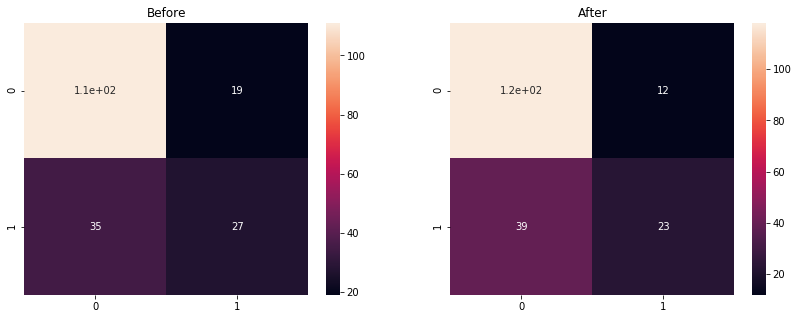

In [891]:
# --- Your code here ---

before = confusion_matrix(y_test1, neigh1_predict)

after = confusion_matrix(y_test1, grid_predict)

fig, ax = plt.subplots(1,2, figsize=(14,5))

sb.heatmap(before, annot=True, ax=ax[0])
sb.heatmap(after, annot=True, ax=ax[1])

ax[0].set_title('Before')
ax[1].set_title('After')
plt.show()

<span style="color:blue">--- The before and after hyperparameter turning heatmaps are above. As you can see the true negatives risen from before the hyperparameter were tuned and the false positives decreased which is good news for the precision and recall. Although the false nagative increased and the truen positive decreased which could lead to misclassification. ---</span>


<span style="color:blue">5) You can get feature importances for some tree-based classifiers in scikit-learn via **clf.feature_importances_**. Example code for plotting pima2 feature importances for an adaboost decision tree classifier has been given below. Generate the plot and describe your observations. Briefly describe how the feature importances for the given classifier can be computed. *(5 points)*</span>

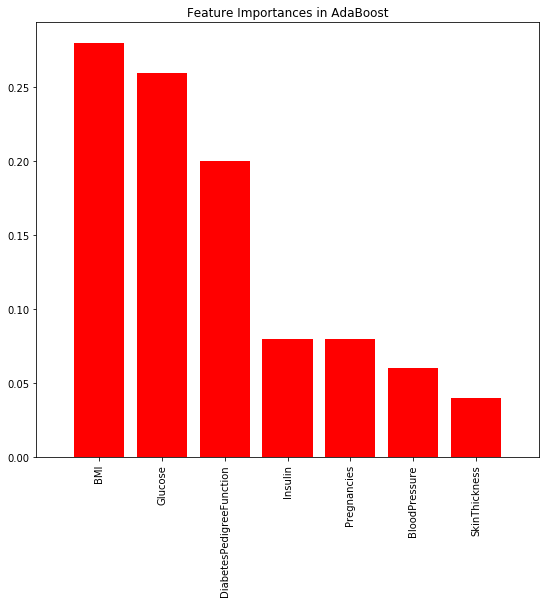

In [892]:
x_train = x_train2
y_train = y_train2.astype(int)

ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train, y_train)
relevants = ada.feature_importances_
indices = np.argsort(relevants)[::-1]

# Plot feature importances
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(x_train.shape[1]), relevants[indices], color='r', align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

<span>---
    Asaboost works by starting with all datapoints having the same weights(Uniform Weight):  ai=1/N
  
   for each iteration of adaboost t .. 1 to T learn ft(x) on weighted data ai then compute the coefficient Wt after which it should then recompute the weights of ai.
    
The final model then predicts by using sign of the sum of the coefficient Wt * ft(x) where t = 1 to T ---</span>


<span style="color:blue">6)  Think  about  how  to  compute  the  feature  importances  for  other  classifiers  in  1).   Select  one classifier (except decsion tree), and generate a similar bar plot showing the feature importances. *(8 points)*</span>

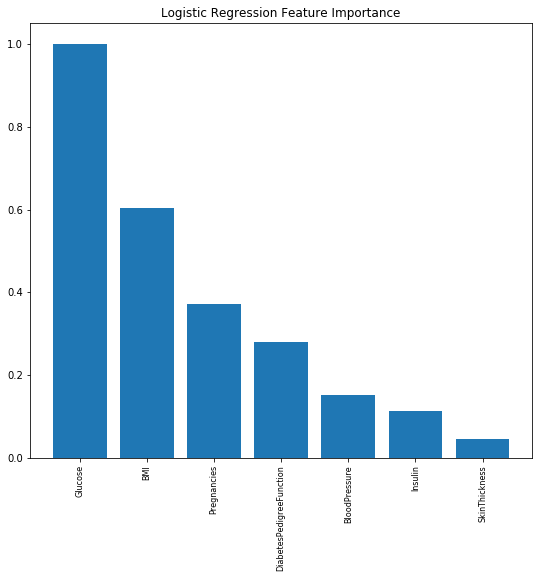

In [893]:
# --- Your code here ---
x_train = x_train2
y_train = y_train2.astype(int)

clf = LogisticRegression()
clf.fit(x_train2, y_train)

# clf.coef gets feature importance data
feature_importance = abs(clf.coef_[0])
feature_importance = feature_importance / feature_importance.max()
sorted_idx = np.argsort(-feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(9,8))
chart = fig.add_subplot(1, 1, 1)
chart.bar(pos, feature_importance[sorted_idx], align='center')
chart.set_xticks(pos)
chart.set_xticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
plt.setp(chart.xaxis.get_majorticklabels(), rotation=90)
plt.title('Logistic Regression Feature Importance')
plt.show()

# 4. Best Model Construction

<span style="color:blue">1) Generate the best classifier you can for predicting the diabetes outcome. Show the classification **accuracy**, **weighted F1** and **confusion matrix** on test data (you should keep the original train test split). Besides that, you can also show any result or plot that are helpful for us to better understand your model. Write a short description of you model indicating the elements that help to improve prediction. You may use any classifier including but not limited to those experimented above. Marks will be given based on your model performance and description. *(13 points)*</span>

<span style="color:blue">*(Hint: you can think about improving the model performance from different aspects: e.g. improve the feature set; choose a more sophisticated classifier such as ensemble models; or improve the training process via careful hyperparameter tunning or sampling techniques.)*</span>

best hyperparameters :  {'C': 0.001, 'penalty': 'l2'}
Accuracy Score:  0.8020833333333334
F1 Score :  0.6607142857142857


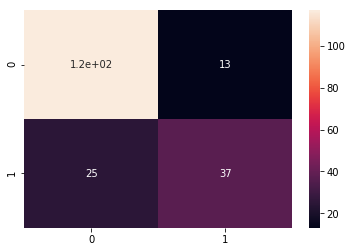

In [894]:
#--- Your code here ---
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
reg=LogisticRegression()
reg_cv=GridSearchCV(reg,grid,cv=10)
reg_cv.fit(x_train2, y_train2)

print("best hyperparameters : ",logreg_cv.best_params_)

#add best hyperparameters
logreg = LogisticRegression(C=1,penalty="l2")
logreg.fit(x_train2, y_train2)

logreg_predict = logreg.predict(x_test2)

logreg_acc = accuracy_score(y_test2, logreg_predict)
print("Accuracy Score: ", logreg_acc)

f1_logreg = f1_score(y_test2,logreg_predict)
print("F1 Score : ",f1_logreg)

matrix = confusion_matrix(y_test1, logreg_predict)

sb.heatmap(matrix, annot=True)




<span>--- After experimenting with many classifiers, the logistic regression classifier still performed the best. I tried to tune the hyperparameters using gridsearch with a crossfold validation of 10 and took the best paramters of this and used these to run logisitic regression again. The results of this was the same as the original logistic regression classifier that was ran previously, showing that the standard hyperparamters for this was indeed the optimum which are an accuracy score of 80.2 and a f1 score of 66. If you refer to the heatmap above this shows the classifier performed well with it having a huge amount of huge negatives which is encouraging to see as it shows the classifier isn't likely to predict someone has diabetes when they actually don't. All the other values for the true positive, false positive and false negative are very now, with it still showing the highest number from these is the 37 of the true positive. Only 38 predictions were either classed as false positive or false nagative which shows, combined with the true postives and true negatives this classifers high precision and recall.---</span>

<span style="color:blue">2) Can the final model you constructed be deployed at the hospital to diagnose patients automatically?  How would the doctors explain the prediction results to the patients?  Write down any of your opinions or concerns. *(2 points)*</span>

<span>--- No this model cannot be used at a hospital for patients as the accuracy score of 80% is not high enough to justify this being used. Additionally the F1 score needs to be higher as there are too many false negatives and false positives giving it not a high enough precision and recall to justify this. The doctors would have to explain that the prediction results as the patient has 80 percent chance they might have type 2 diabetes due to their data, although the chances of being miss classified are at 20 percent meaning using this classifier would be pointless as it is not precise enough. ---</span>